<a href="https://colab.research.google.com/github/alpaalpaca/data_analysis/blob/main/cohort_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [ ]:
from google import colab
colab.drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/portfolio/data3/user_data.csv', index_col = 0)

In [ ]:
weekday = [dt for dt in data['ACT_DATE'].drop_duplicates().tolist() if date(int(dt[0:4]), int(dt[5:7]), int(dt[8:10])).weekday() <5]

In [ ]:
weekday_data = data[data['ACT_DATE'].isin(weekday)].copy(deep=True)

In [ ]:
weekday_data

,ACT_DATE,INTEREST_FIELD
USER_SEQ,,
2,2021-11-15,Event
3,2021-11-15,Event
4,2021-11-15,Coummunity
5,2021-11-15,Portfolio
6,2021-11-15,Event
...,...,...
7,2021-11-26,Coummunity
8,2021-11-26,Coummunity
9,2021-11-26,Event


In [ ]:
weekday_list = weekday_data['ACT_DATE'].drop_duplicates().to_list()[0:5]

In [ ]:
weekday_list

['2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19']

In [ ]:
weekday_data = weekday_data[weekday_data['INTEREST_FIELD']=='Portfolio'].copy(deep=True)

In [ ]:
weekday_data
weekday_list

['2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19']

In [ ]:
weekday_data = weekday_data[weekday_data['ACT_DATE'].isin(weekday_list)].copy(deep=True)

In [ ]:
weekday_data.reset_index(inplace=True)

In [ ]:
weekday_data = weekday_data[['USER_SEQ','ACT_DATE']].drop_duplicates()

In [ ]:
weekday_data.set_index('USER_SEQ',inplace=True)

In [ ]:
weekday_data

,ACT_DATE
USER_SEQ,
5,2021-11-15
11,2021-11-15
19,2021-11-15
44,2021-11-15
47,2021-11-15
...,...
43,2021-11-19
18,2021-11-19
54,2021-11-19


In [ ]:
weekday_data['CohortGroup'] = weekday_data.groupby(level=0)['ACT_DATE'].min()

In [ ]:
weekday_data.query("USER_SEQ == 1")

,ACT_DATE,CohortGroup
USER_SEQ,,
1,2021-11-15,2021-11-15
1,2021-11-16,2021-11-15
1,2021-11-17,2021-11-15
1,2021-11-18,2021-11-15
1,2021-11-19,2021-11-15


In [ ]:
weekday_data.reset_index(inplace=True)

In [ ]:
grouped = weekday_data.groupby(['CohortGroup', 'ACT_DATE'])

In [ ]:
cohorts = grouped.agg({'USER_SEQ': pd.Series.nunique})

In [ ]:
cohorts.rename(columns={'USER_SEQ': 'TotalUsers',
                        }, inplace=True)
cohorts.head()

TotalUsers
CohortGroup ACT_DATE              
2021-11-15  2021-11-15          66
            2021-11-16          46
            2021-11-17          38
            2021-11-18          39
            2021-11-19          33

In [ ]:
def cohort_period(data):
  data['CohortPeriod'] = np.arange(len(data)) + 1
  return data

In [ ]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)

In [ ]:
cohorts

TotalUsers  CohortPeriod
CohortGroup ACT_DATE                            
2021-11-15  2021-11-15          66             1
            2021-11-16          46             2
            2021-11-17          38             3
            2021-11-18          39             4
            2021-11-19          33             5
2021-11-16  2021-11-16          16             1
            2021-11-17           9             2
            2021-11-18           9             3
            2021-11-19           7             4
2021-11-17  2021-11-17           6             1
            2021-11-18           5             2
            2021-11-19           3             3
2021-11-18  2021-11-18           4             1
            2021-11-19           3             2

In [ ]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

In [ ]:
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2021-11-15    66
2021-11-16    16
2021-11-17     6
2021-11-18     4
Name: TotalUsers, dtype: int64

In [ ]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2021-11-15,2021-11-16,2021-11-17,2021-11-18
CohortPeriod,,,,
1,1.000000,1.0000,1.000000,1.00
2,0.696970,0.5625,0.833333,0.75
3,0.575758,0.5625,0.500000,NaN
4,0.590909,0.4375,NaN,NaN
5,0.500000,NaN,NaN,NaN


In [ ]:
user_retention

CohortGroup,2021-11-15,2021-11-16,2021-11-17,2021-11-18
CohortPeriod,,,,
1,1.000000,1.0000,1.000000,1.00
2,0.696970,0.5625,0.833333,0.75
3,0.575758,0.5625,0.500000,NaN
4,0.590909,0.4375,NaN,NaN
5,0.500000,NaN,NaN,NaN


In [ ]:
user_retention[['2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.ylabel('% of Cohort Visiting');

KeyError: ignored

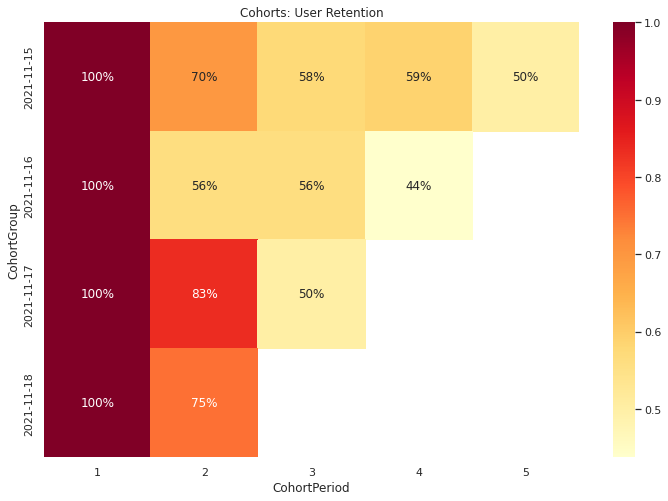

In [ ]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, cmap="YlOrRd", fmt='.0%');